In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import pandas as pd
import pandas_datareader.data as web

import numpy as np

from scipy.stats import norm

In [2]:
df = web.DataReader('msft','yahoo', start='1987-01-01')

df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

df['50 Day Avg'] = df['Adj Close'].rolling(50, min_periods=0).mean()

df = df.drop('Volume', axis=1)
df = df.drop('High', axis=1)
df = df.drop('Low', axis=1)
df = df.drop('Open', axis=1)
df = df.drop('Close', axis=1)

df.to_csv(r'C:\Users\Stetson\PyProjects\Data\PDF_Markov.csv')
print(df)

             Adj Close  50 Day Avg
Date                              
1987-01-02    0.105826    0.105826
1987-01-05    0.111921    0.108873
1987-01-06    0.113583    0.110443
1987-01-07    0.119678    0.112752
1987-01-08    0.123556    0.114913
...                ...         ...
2020-10-09  215.809998  211.118805
2020-10-12  221.399994  211.456493
2020-10-13  222.860001  211.593336
2020-10-14  220.860001  211.755023
2020-10-15  219.660004  211.899694

[8517 rows x 2 columns]


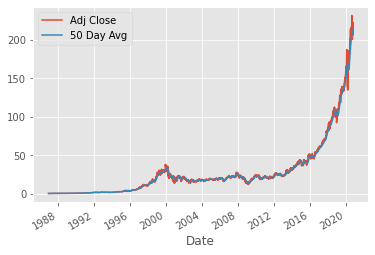

In [3]:
df.plot()
plt.show()

In [50]:
df['delta'] = df['Adj Close'].diff()
#df['delta'] = np.around(df['delta'], decimals=0)

a = df['Adj Close'].pct_change()
b = 100

df['delta_%'] = a*b
#df['delta_%'] = np.around(df['delta_%'], decimals=0)

n = df['Adj Close'].count()

df.to_csv(r'C:\Users\Stetson\PyProjects\Data\PDF_Markov.csv')
df.describe()
print(n)

8517


A:\Programs\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
A:\Programs\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


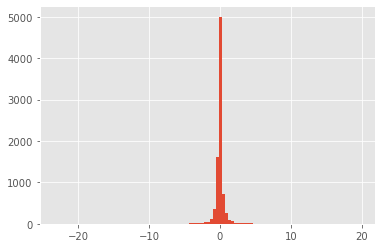

In [10]:
plt.hist(df['delta'], bins=100)
#df['delta'].plot.kde()
plt.show()

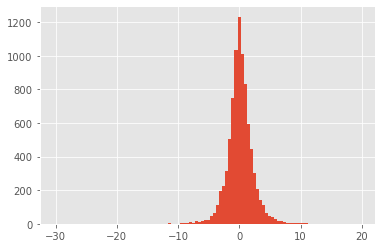

In [6]:
plt.hist(df['delta_%'], bins=100)
#df['delta_%'].plot.kde()
plt.show()

In [51]:
df['delta_int'] = np.around(df['delta'], decimals=0)
df['delta_%_int'] = np.around(df['delta_%'], decimals=0)

d_int_max = df['delta_int'].max()
d_int_min = df['delta_int'].min()

df.to_csv(r'C:\Users\Stetson\PyProjects\Data\PDF_Markov.csv')
df.describe()

,Adj Close,50 Day Avg,delta,delta_%,delta_int,delta_%_int
count,8517.000000,8517.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,27.558707,26.950149,0.025781,0.112822,0.027830,0.112494
std,37.163804,35.789864,0.950000,2.144403,0.963235,2.158331
min,0.105826,0.105826,-23.288681,-30.115868,-23.000000,-30.000000
25%,3.355958,3.142383,-0.109706,-0.921686,0.000000,-1.000000
50%,18.908747,18.828371,0.001108,0.037991,0.000000,0.000000
75%,26.807779,26.275205,0.139622,1.133207,0.000000,1.000000
max,231.649994,211.899694,19.667542,19.565202,20.000000,20.000000


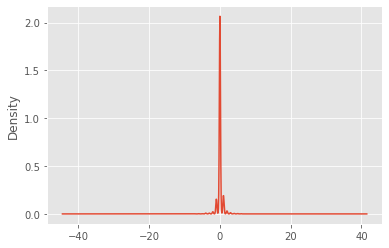

In [32]:
ax = df['delta_int'].plot.kde()

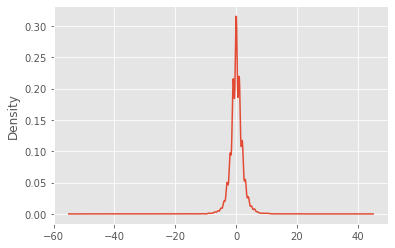

In [33]:
ax = df['delta_%_int'].plot.kde()

In [49]:
#Probability Delta Int Matrix

pmin = -25    #df['delta_%_int'].min()
pmax = 25     #df['delta_%_int'].max()

if df['delta_%_int'] == 0:
    

count(prob_0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
# generate a sample
sample1 = df['delta_int']
sample2 = df['delta_%_int']
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(-24, 20)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

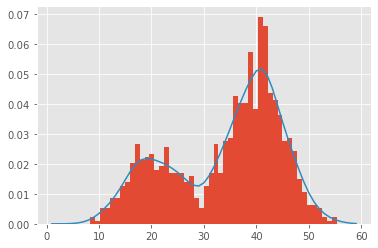

In [11]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()